In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
from mplsoccer import Sbopen
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [32]:
# instantiate a parser object
parser = Sbopen()
df_competition = parser.competition()
#df_competition.iloc[np.where(df_competition["competition_name"]== "Premier League")]
#df_competition.sort_values(by='season_name')
#df_competition.to_excel("comp.xlsx")

In [33]:
# 2015-2016 chosen for portfolio
df_match = parser.match(competition_id=16, season_id=26)
df_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,18242,2015-06-06,2015-06-06 20:45:00,1,3,available,scheduled,2020-07-29 05:00:00,2021-06-13 16:17:31.694,1,...,26,Final,367,Olympiastadion Berlin,85,Germany,581,Cüneyt Çakιr,233,Turkey


In [34]:
lineups = []
for i, match in df_match.iterrows():
    print(match.match_id)
    lineups.append(parser.lineup(match.match_id))
lineups = pd.concat(lineups)
lineups

18242


,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,3477,Álvaro Borja Morata Martín,Álvaro Morata,9,18242,224,Juventus,214,Spain
1,3486,Fernando Llorente Torres,Fernando Llorente,14,18242,224,Juventus,214,Spain
2,3579,Roberto Maximiliano Pereyra,Roberto Pereyra,37,18242,224,Juventus,11,Argentina
3,3843,Angelo Obinze Ogbonna,Angelo Ogbonna,5,18242,224,Juventus,112,Italy
4,5541,Stephan Lichtsteiner,Stephan Lichtsteiner,26,18242,224,Juventus,221,Switzerland
5,6943,Andrea Barzagli,Andrea Barzagli,15,18242,224,Juventus,112,Italy
6,6949,Gianluigi Buffon,Gianluigi Buffon,1,18242,224,Juventus,112,Italy
7,7013,Stefano Sturaro,Stefano Sturaro,27,18242,224,Juventus,112,Italy
8,7173,Leonardo Bonucci,Leonardo Bonucci,19,18242,224,Juventus,112,Italy
9,7952,Simone Padoin,Simone Padoin,20,18242,224,Juventus,112,Italy


In [35]:
df_event, df_related, df_freeze, df_tactics = parser.event(18242)

# exploring the data

#df_related.info()
#df_freeze.info()
#df_tactics.info()
df_event = df_event.merge(lineups[['player_id','player_nickname']],on="player_id",how="left")
df_event["dx"] = df_event["end_x"] - df_event["x"] 
df_event["dy"] = df_event["end_y"] - df_event["y"] 
df_event.info()
print(df_event.columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3433 entries, 0 to 3432
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3433 non-null   object 
 1   index                           3433 non-null   int64  
 2   period                          3433 non-null   int64  
 3   timestamp                       3433 non-null   object 
 4   minute                          3433 non-null   int64  
 5   second                          3433 non-null   int64  
 6   possession                      3433 non-null   int64  
 7   duration                        2565 non-null   float64
 8   match_id                        3433 non-null   int64  
 9   type_id                         3433 non-null   int64  
 10  type_name                       3433 non-null   object 
 11  possession_team_id              3433 non-null   int64  
 12  possession_team_name            34

In [50]:
class footyviz:
    def __init__(self, data, pitch):
        # two eminent components, data and pitch
        self.data = data
        self.pitch = pitch
        self.pitchLengthX = 120 # predefined pitch length, changeable
        self.pitchWidthY = 80 # predefined pitch width, changeable
        self.figSizeX = 10 # predefined figure size x, changeable
        self.figSizeY = 7.727 # predefined figure size y, changeable
        self.zorder = 3 # starting zorder, will change in every addition
        self.backgroundColor = pitch.pitch_color
        self.title_font = {'size':'20', 'color':'black', 'weight':'bold'}
        # create a colormap
        self.colors = [(0, self.backgroundColor), (0.5, "yellow"), (1, "red")]
        self.colormap = LinearSegmentedColormap.from_list("green_yellow_red", self.colors)
    def navigate(self, **filters):
        query_string = ' & '.join([f'({col} == {repr(val)})' for col, val in filters.items()])
        self.data = self.data.query(query_string)
        #return self.data
    def heatmap(self,title):
        #self.backgroundColor = background_hex
        self.fig, self.ax = self.pitch.draw(figsize=(self.figSizeX, self.figSizeY),constrained_layout=False,tight_layout=True)
        kde = sns.kdeplot(x=self.data.x,y=self.data.y,fill=True,ax=self.ax,shade_lowest=False,n_levels=1000,cmap= self.colormap)
        # Set the limits of the axes
        self.fig.set_facecolor(self.backgroundColor)
        self.ax.set_xlim(-0.5, self.pitchLengthX+0.5)
        self.ax.set_ylim(-0.27, self.pitchWidthY+0.1)
        self.ax.set_aspect('equal')
        self.ax.set_title(title, **self.title_font, loc='center')
        plt.gca().invert_yaxis()
        # Adding a fancy title

    def scatty(self):
        sns.scatterplot(x='x', y='y', data=self.data, ec=None,alpha=1, color = 'gray',zorder=3, legend=False)

Lionel Messi    85
Name: player_nickname, dtype: int64

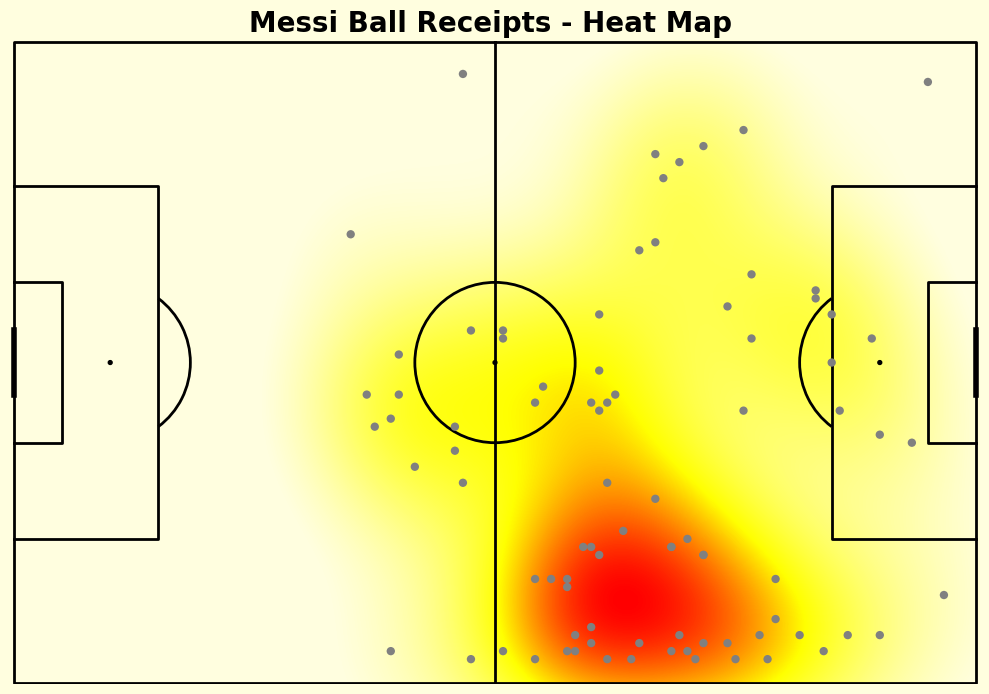

In [55]:
pitchtry = Pitch(pitch_type='statsbomb', pitch_color='#FFFEDF',line_zorder=2,line_color='k')  #FFFFFF  #40A03F  #FFFEDF
analyzer = footyviz(df_event, pitchtry)
analyzer.navigate(type_name='Ball Receipt',team_name='Barcelona',player_nickname='Lionel Messi')
title = "Messi Ball Receipts - Heat Map "
analyzer.heatmap(title)
analyzer.scatty()
analyzer.data.player_nickname.value_counts()

In [56]:
analyzer.data

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_backheel,foul_committed_advantage,dribble_overrun,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,injury_stoppage_in_chain,player_nickname,dx,dy
103,2a3b2b68-98f7-4004-83e2-bb93bd0fd962,103,1,00:02:40.477000,2,40,10,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
134,02111e05-b263-415f-8812-a6e49e6862e4,134,1,00:03:13.719000,3,13,10,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
230,2e91ad5b-bbca-4175-b626-b5722041a609,230,1,00:06:16.126000,6,16,14,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
255,baf6f0b5-280a-4f14-b6ca-6fd12a04e449,255,1,00:06:39.977000,6,39,14,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
274,34355c2e-ac49-41b6-a194-b4140b08234b,274,1,00:07:19.356000,7,19,15,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287,21a3256e-1d0b-4878-9346-5de382ca2855,3288,2,00:45:15.582000,90,15,184,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
3359,eb26b28a-75ea-46af-bfad-818b835aa8ce,3360,2,00:48:03.840000,93,3,189,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
3367,708a75ef-1349-4814-bc98-3f25d4c55e6a,3368,2,00:48:13.188000,93,13,189,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN
3370,95c3d925-79ee-4f30-b85a-80266f825220,3371,2,00:48:41.778000,93,41,190,NaN,18242,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lionel Messi,NaN,NaN


In [188]:
pitch = Pitch(pitch_type="statsbomb",pitch_color='#40A03F', stripe_color='#389C39', line_color='white', stripe=True, corner_arcs=True,line_zorder=3)
pitch_gray = Pitch(pitch_type="statsbomb",pitch_color='#C1C1C1', line_color='black', stripe=False, corner_arcs=True,line_zorder=2)
#C1C1C1
#fig, ax = pitch.draw(figsize=(10, 7.727))

579


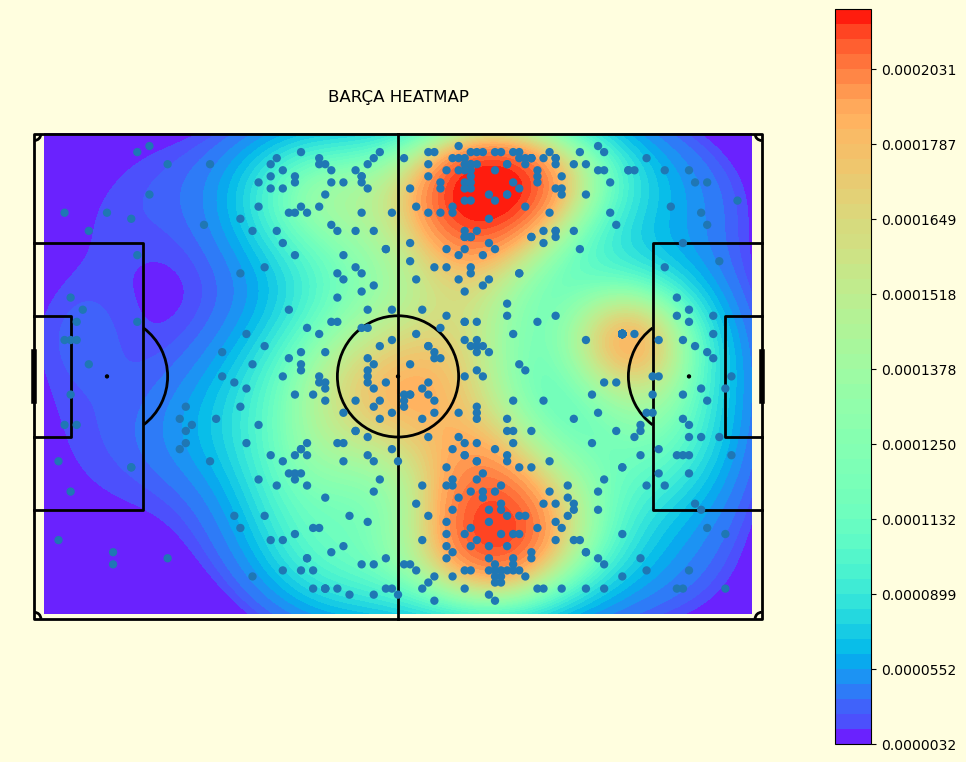

In [141]:

fig, ax = pitch_gray.draw(figsize=(10, 7.727),constrained_layout=False,tight_layout=True)
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
plt.gca().invert_yaxis()
df_ball_receipts = df_event[(df_event['type_name'] == 'Ball Receipt')&(df_event['team_name'] == 'Barcelona')]
print(len(df_ball_receipts))
# Plot the pass receipt locations
#pitch.scatter(, df_passes['end_y'], s=20, color='purple',alpha=.6 ,ax=ax)

#sns.scatterplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.6, palette='Set1',zorder=2, legend=False)
sns.scatterplot(x='x', y='y', data=df_ball_receipts, ec=None,alpha=1, palette='Blues',zorder=3, legend=False)
sns.kdeplot(x='x', y='y', data=df_ball_receipts, fill=True, thresh=0, n_levels=50, cmap="rainbow",zorder=1,cbar=True,cut=0.27)#FFFEDF
plt.title("BARÇA HEATMAP")
plt.show()

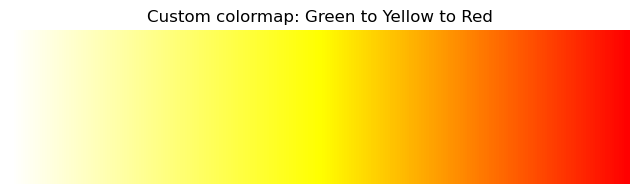

In [240]:
import matplotlib.pyplot as plt

import numpy as np

# Define the colors at specific points between 0 and 1
colors = [(0, "#FFFFFF"), (0.5, "yellow"), (1, "red")]

# Create a colormap
colormap = LinearSegmentedColormap.from_list("green_yellow_red", colors)

# Example usage: plot a gradient using the custom colormap
gradient = np.linspace(0, 1, 256).reshape(1, -1)
gradient = np.vstack((gradient, gradient))

fig, ax = plt.subplots(figsize=(8, 2))
ax.set_title('Custom colormap: Green to Yellow to Red')
ax.imshow(gradient, aspect='auto', cmap=colormap)
ax.set_axis_off()
plt.show()


Text(0.5, 1.0, 'Andrés Iniesta Luján Ball Receipts')

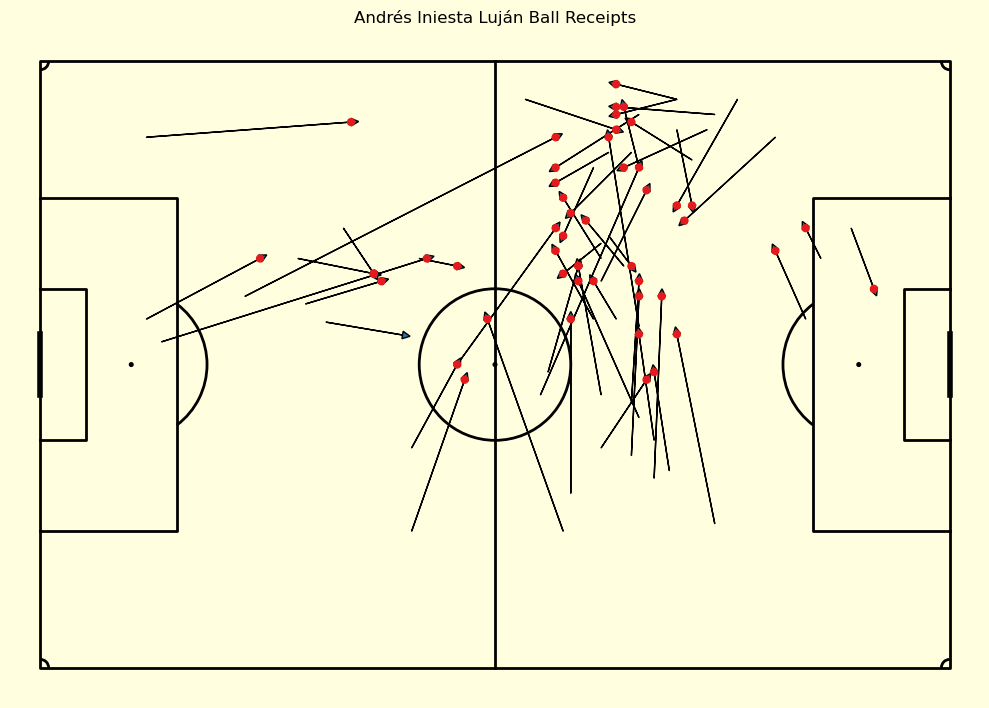

In [42]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
#plt.gca().invert_yaxis()
#plt.arrow(57.8,3.8,65.7-57.8,0.6-3.8,head_width=1, head_length=1,zorder=6)
#plt.arrow(55.7,80.0,80.1-55.7,73.7-80.0,head_width=1, head_length=1,zorder=6)
df_ball_receipts = df_event[(df_event['type_name'] == 'Pass')&(df_event['pass_recipient_name'] == 'Andrés Iniesta Luján')&(df_event['outcome_name'].isna())]
sns.scatterplot(x='end_x', y='end_y', data=df_ball_receipts, hue='team_name', ec=None,alpha=1, palette='Set1',zorder=3, legend=False)
plt.arrow(37.7,34.4,47.8-37.7,36.1-34.4,head_width=1, head_length=1,zorder=6)
for i in range(len(df_ball_receipts)):
    x = df_ball_receipts.iloc[i].loc["x"]
    y = df_ball_receipts.iloc[i].loc["y"]
    end_x = df_ball_receipts.iloc[i].loc["end_x"]
    end_y = df_ball_receipts.iloc[i].loc["end_y"]
    plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=2)
plt.title("Andrés Iniesta Luján Ball Receipts")

Text(0.5, 1.0, 'Andrés Iniesta Luján Pass & Heat Map')

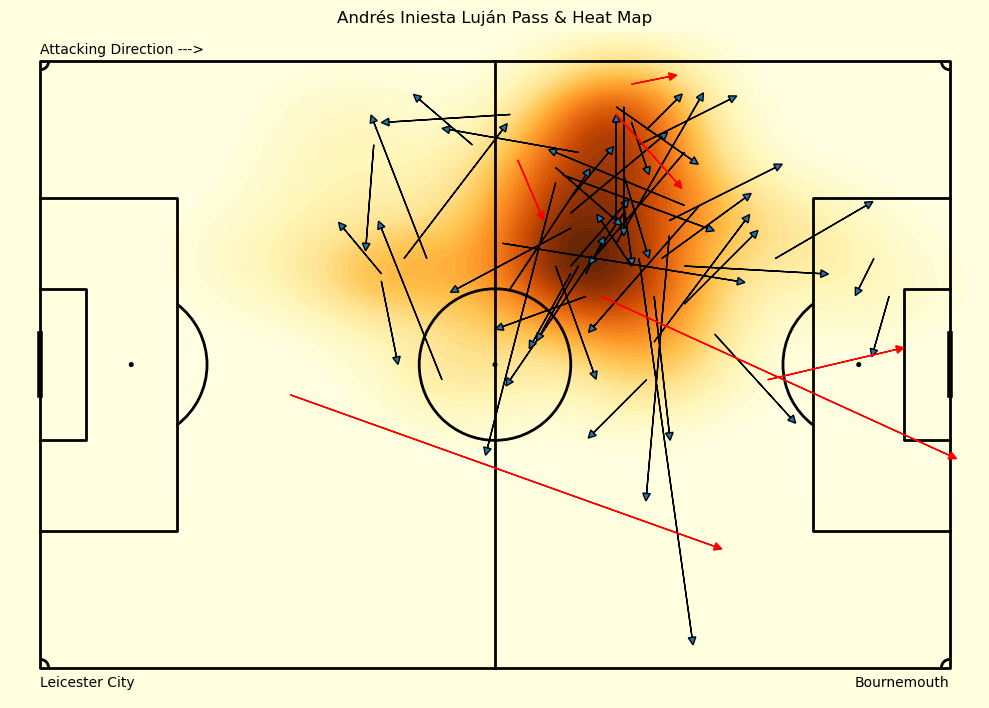

In [43]:
import seaborn as sns
import math
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
#plt.gca().invert_yaxis()
#plt.arrow(57.8,3.8,65.7-57.8,0.6-3.8,head_width=1, head_length=1,zorder=6)
#plt.arrow(55.7,80.0,80.1-55.7,73.7-80.0,head_width=1, head_length=1,zorder=6)
df_passes = df_event[(df_event['type_name'] == 'Pass')&(df_event.player_name == "Andrés Iniesta Luján")]
df_ball_receipts = df_event[(df_event['type_name'] == 'Ball Receipt')&(df_event.player_name == "Andrés Iniesta Luján")]
#sns.scatterplot(x='x', y='y', data=df_passes, ec=None,alpha=1, palette='Set1',zorder=6, legend=False)
sns.kdeplot(x='x', y='y', data=df_ball_receipts, fill=True, thresh=0, n_levels=50, cmap="YlOrBr",zorder=1)#FFFEDF
plt.annotate("Attacking Direction --->",(0,-1))
plt.annotate("Leicester City",(0,82.5))
plt.annotate("Bournemouth", xy=(120, 82.5), horizontalalignment='right')

for i in range(len(df_passes)):
    try:
        if math.isnan(df_passes.iloc[i].loc["outcome_name"]):
            x = df_passes.iloc[i].loc["x"]
            y = df_passes.iloc[i].loc["y"]
            end_x = df_passes.iloc[i].loc["end_x"]
            end_y = df_passes.iloc[i].loc["end_y"]
            plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=6)
    except:
        x = df_passes.iloc[i].loc["x"]
        y = df_passes.iloc[i].loc["y"]
        end_x = df_passes.iloc[i].loc["end_x"]
        end_y = df_passes.iloc[i].loc["end_y"]
        plt.arrow(x,y,end_x-x,end_y-y,head_width=1, head_length=1,zorder=6,color='red')
plt.title(f"{df_passes.player_name.max()} Pass & Heat Map")

In [44]:

df_passes[df_passes.x > 114].pass_recipient_name


Series([], Name: pass_recipient_name, dtype: object)

In [45]:
shots[shots.outcome_name == "Goal"]

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,pass_backheel,foul_committed_advantage,dribble_overrun,foul_won_advantage,substitution_replacement_id,substitution_replacement_name,injury_stoppage_in_chain,player_nickname,dx,dy
148,6ff7a431-2cf4-4f5a-8348-256c6dc44dad,148,1,00:03:24.616000,3,24,10,0.441861,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.7
2256,d8de9c17-e485-4624-938f-a340318ba58d,2257,2,00:09:17.750000,54,17,114,0.269100,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.6
2762,344acb91-8f9e-499d-ae65-39d7305e39ad,2763,2,00:22:53.334000,67,53,148,1.040347,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,-0.8
3511,b09ba265-78b8-4bc6-af24-eb3c4047c8e3,3428,2,00:51:40.484000,96,40,194,0.997175,18242,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,11.0


                                       id  index  period        timestamp  \
52   e037c6c5-3cfe-48f1-9a43-ce8385d0b7aa     52       1  00:00:50.006000   
69   b028efbb-c5d9-4f82-9b3f-6afb32ebda0b     69       1  00:01:36.085000   
148  6ff7a431-2cf4-4f5a-8348-256c6dc44dad    148       1  00:03:24.616000   
296  393f16bd-fe24-4832-80da-004d9b9d058e    296       1  00:07:40.430000   
328  15d1aa41-9064-4c15-ab88-157fc9140369    328       1  00:08:29.338000   

     minute  second  possession  duration  match_id  type_id  ...  \
52        0      50           5  0.977244     18242       16  ...   
69        1      36           7  0.972500     18242       16  ...   
148       3      24          10  0.441861     18242       16  ...   
296       7      40          16  0.413759     18242       16  ...   
328       8      29          18  1.240685     18242       16  ...   

    pass_backheel  foul_committed_advantage dribble_overrun  \
52            NaN                       NaN             NaN

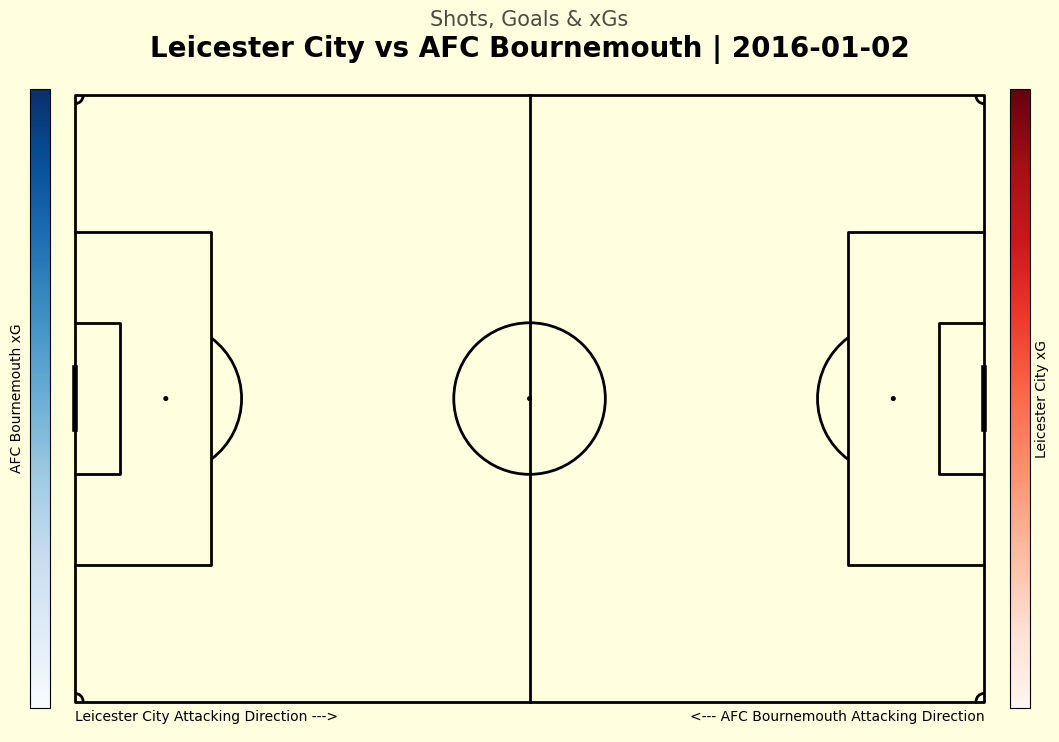

In [50]:
from adjustText import adjust_text
match_id_required = df_match.match_id[0]
home_team_required = df_match.home_team_name[0]
away_team_required = df_match.away_team_name[0]
pitchLengthX = 120
pitchWidthY = 80
shots = df_event[df_event.type_name == 'Shot']
print(shots.head())
figSizeX = 10
figSizeY = 7.727
fig, ax = pitch_gray.draw(figsize=(figSizeX, figSizeY))
home_team_required
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')

plt.Circle((114,50),4,color="blue",zorder=6)
plt.annotate("",(0,-1))
plt.annotate(f"{home_team_required} Attacking Direction --->",(0,82.5))
plt.annotate(f"<--- {away_team_required} Attacking Direction", xy=(120, 82.5), horizontalalignment='right')
goal_coor = []
# Create lists to store text annotations
home_goal_annotations = []
away_goal_annotations = []

# Loop through shots and plot them
for i, shot in shots.iterrows():
    x = shot.x
    y = shot.y
    goal = shot.outcome_name == 'Goal'
    team_name = shot.team_name
    circleRadius = figSizeX * 0.1
    circleLineWidth = circleRadius * 1.5
    
    if team_name == home_team_required:
        if goal:
            goal_coor.append((x, y))
            shotCircle = mpatches.Circle((x, y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            plt.annotate(shot.player_name,(x, y),bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"),zorder=7,ha='right')
            # Store goal scorer's name for annotation
            home_goal_annotations.append((shot.player_name, x - 1, y + 1))
        else:
            cmap = plt.get_cmap('Reds')
            shotCircle = mpatches.Circle((x,y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
    elif team_name == away_team_required:
        if goal:
            shotCircle = plt.Circle((pitchLengthX - x, pitchWidthY-y), radius=circleRadius, facecolor='green', edgecolor="k", linewidth=circleLineWidth, zorder=6)
            ax.add_patch(shotCircle)
            # Store goal scorer's name for annotation
            plt.annotate(shot.player_name,(pitchLengthX - x, pitchWidthY-y),bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5"),zorder=7)
            away_goal_annotations.append((shot.player_nickname, pitchLengthX - x - 1, y + 1))
        else:
            cmap = plt.get_cmap('Blues')
            shotCircle = mpatches.Circle((pitchLengthX - x, y), radius=circleRadius, edgecolor="k", linewidth=circleLineWidth, facecolor=cmap(shot.shot_statsbomb_xg * 15), zorder=6)
            ax.add_patch(shotCircle)
            
#adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in home_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})
#adjust_text([plt.text(x, y, name, ha='right', va='bottom', zorder=7, bbox=dict(facecolor='white', alpha=0.5, boxstyle="round,pad=0.5")) for name, x, y in away_goal_annotations], autoalign='x', only_move={'points':'y', 'text':'y'})


# access legend objects automatically created from data
handles, labels = plt.gca().get_legend_handles_labels()

# create manual symbols for legend
patch = mpatches.Patch(color='grey', label='manual patch')   
line = Line2D([0], [0], label='manual line', color='k')
point = Line2D([0], [0], label='manual point', marker='s', markersize=10, 
         markeredgecolor='r', markerfacecolor='k', linestyle='')
circ = mpatches.Circle((0,0), radius=circleRadius,edgecolor="k", linewidth=circleRadius*1.5)
# add manual symbols to auto legend
handles.extend([patch, line, point,circ])

# Create a colorbar for Leicester City ('Blues') on the left side
cmap_blue = plt.get_cmap('Blues')
norm_blue = plt.Normalize(vmin=0, vmax=1)  # Modify the limits as needed
sm_blue = ScalarMappable(cmap=cmap_blue, norm=norm_blue)
sm_blue.set_array([])

# Create a separate axis for the Leicester City colorbar
cbar_ax_blue = fig.add_axes([0.0,0.1,0.02,.8])  # Adjust the position and size as needed
cbar_blue = plt.colorbar(sm_blue, cax=cbar_ax_blue)
cbar_blue.set_ticks([])  # Remove the ticks and numbers
cbar_blue.ax.yaxis.set_label_position('left')  # Move the label to the left side of the colorbar
cbar_blue.set_label(f'{away_team_required} xG')

# Create a colorbar for Bournemouth ('Reds') on the right side
cmap_red = plt.get_cmap('Reds')
norm_red = plt.Normalize(vmin=0, vmax=1)  # Modify the limits as needed
sm_red = ScalarMappable(cmap=cmap_red, norm=norm_red)
sm_red.set_array([])

# Create a separate axis for the Bournemouth colorbar
cbar_ax_red = fig.add_axes([0.98, 0.1, 0.02, 0.8])  # Adjust the position and size as needed
cbar_red = plt.colorbar(sm_red, cax=cbar_ax_red)
cbar_red.set_ticks([])  # Remove the ticks and numbers
cbar_red.set_label(f'{home_team_required} xG')
ax.set_title(f"{home_team_required} vs {away_team_required} | 2016-01-02", fontsize=20, fontweight='bold', loc='center')
fig.text(0.5, 0.99, "Shots, Goals & xGs", ha='center', va='center', fontsize=15, alpha=0.7)
# Show the plot
plt.show()
#plt.legend(handles=handles) 



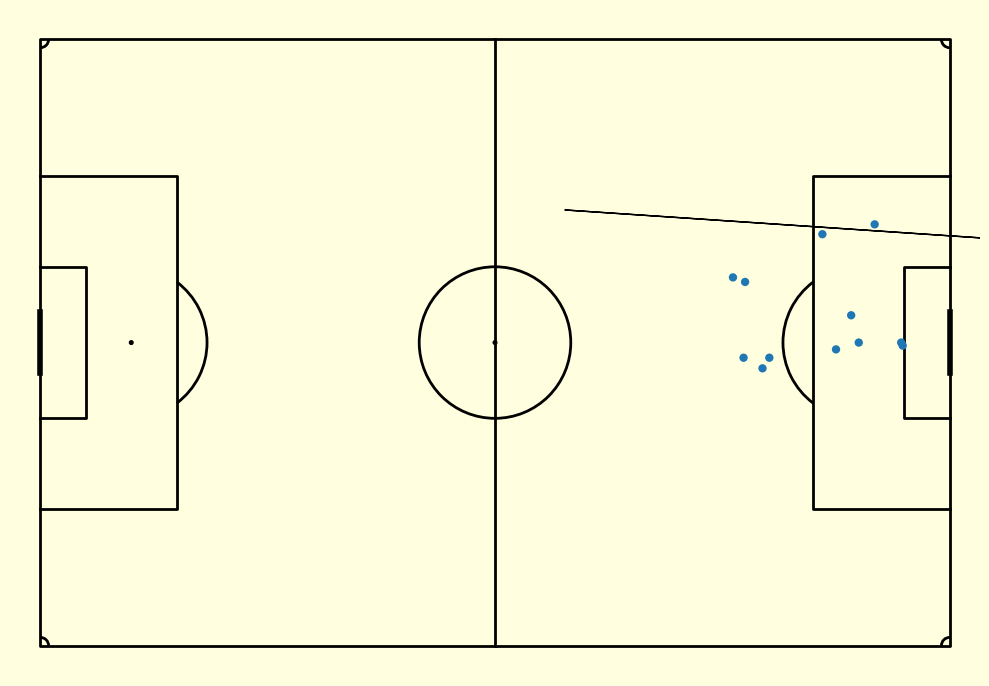

In [ ]:
figSizeX = 10
figSizeY = 7.727
fig, ax = pitch_gray.draw(figsize=(figSizeX, figSizeY))
fig.set_facecolor('#FFFEDF')
ax.patch.set_facecolor('#FFFEDF')
plt.arrow(69.2,57.5,120.0-57.5,53.3-57.5,head_width=1, head_length=1,zorder=6)
shots[shots.shot_statsbomb_xg==  min(shots.shot_statsbomb_xg)][["timestamp","period","player_name","x","y","end_x","end_y"]]
df = shots[shots.team_name == 'Leicester City']
sns.scatterplot(x='x', y='y', data=df, ec=None,alpha=1, palette='Blues',zorder=3, legend=False)
plt.gca().invert_yaxis()

C:\Users\murat\AppData\Local\Temp\ipykernel_22116\3657011878.py:29: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm1, label='Colorbar 1')
C:\Users\murat\AppData\Local\Temp\ipykernel_22116\3657011878.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm2, label='Colorbar 2')


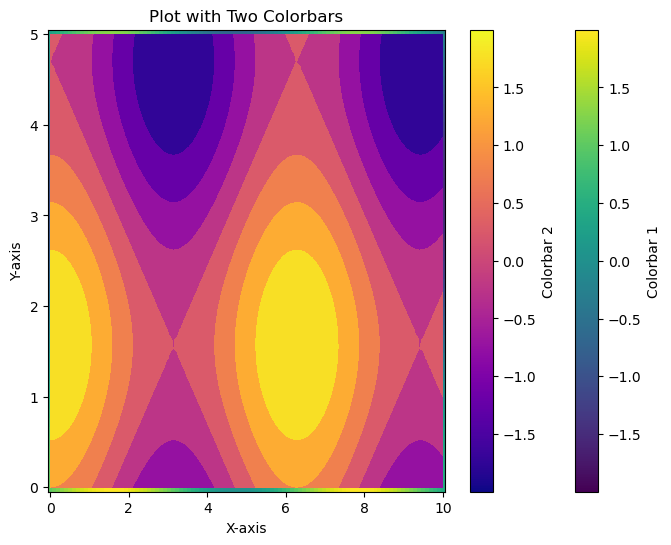

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Generate some example data
x = np.linspace(0, 10, 100)
y = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X) + np.cos(Y)
Z2 = np.cos(X) + np.sin(Y)

# Create a custom color scale and normalize it
norm1 = Normalize(vmin=np.min(Z1), vmax=np.max(Z1))
norm2 = Normalize(vmin=np.min(Z2), vmax=np.max(Z2))

# Create a ScalarMappable for each color scale
cmap1 = plt.get_cmap('viridis')  # Choose a colormap
sm1 = ScalarMappable(cmap=cmap1, norm=norm1)
sm1.set_array([])

cmap2 = plt.get_cmap('plasma')  # Choose another colormap
sm2 = ScalarMappable(cmap=cmap2, norm=norm2)
sm2.set_array([])

# Create your plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, Z1, cmap=cmap1, shading='auto')
plt.colorbar(sm1, label='Colorbar 1')

# Add a second color scale to the same plot
plt.contourf(X, Y, Z2, cmap=cmap2)
plt.colorbar(sm2, label='Colorbar 2')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Plot with Two Colorbars')
plt.show()


In [ ]:
min(shots.shot_statsbomb_xg)

0.0038485425

In [ ]:
goal_arr = np.array(goal_coor)
print(goal_arr)
goal_arr[np.where((goal_arr <=107+1) & (goal_arr >=107-1) )]

shots.shot_statsbomb_xg

[[107.7  36.7]
 [103.7  37.4]]


479     0.047457
497     0.059493
594     0.466867
785     0.018788
846     0.553493
1210    0.027663
1216    0.107173
1240    0.030402
1392    0.057614
1540    0.003849
1577    0.127294
1884    0.783500
1931    0.084619
1952    0.069871
2169    0.041610
2188    0.058197
2194    0.026870
2271    0.022614
2455    0.218477
2670    0.032022
2766    0.055452
3257    0.041740
Name: shot_statsbomb_xg, dtype: float64

212


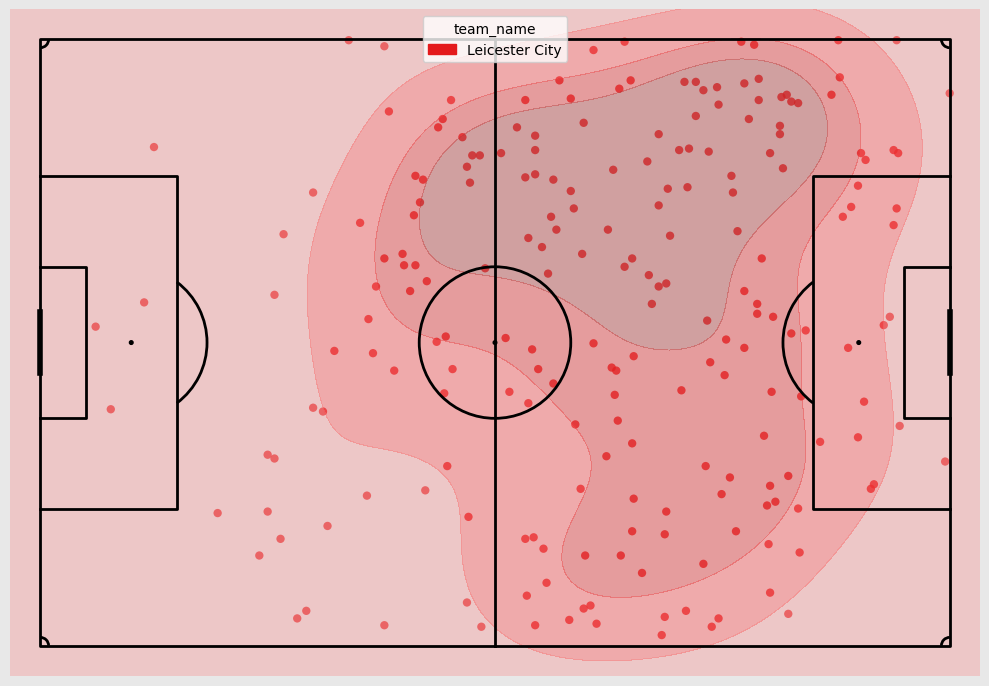

In [ ]:
import seaborn as sns
fig, ax = pitch_gray.draw(figsize=(10, 7.727))
#fig, ax1 = pitch_gray.draw(figsize=(10, 7.727))
fig.set_facecolor('#E8E8E8')
ax.patch.set_facecolor('#E8E8E8')
plt.gca().invert_yaxis()
df_passes = df_event[(df_event['type_name'] == 'Pass')&(df_event['team_name'] == 'Leicester City')&(df_event['period'] == 2)]
print(len(df_passes))
# Plot the pass receipt locations
#pitch.scatter(, df_passes['end_y'], s=20, color='purple',alpha=.6 ,ax=ax)

sns.scatterplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.8, palette='Set1')
sns.kdeplot(x='end_x', y='end_y', data=df_passes, hue='team_name', ec=None,alpha=.4, palette='Set1', fill=True, hade_lowest=False, thresh=0, n_levels=5,cmap='mako',legend=True)


plt.title
plt.show()

307